# Proposal

## Data Description
### Players Data Set
<b>Summary Statistics: <br>
|      | played_hours | Age |
|------|-------------|-----|
|Mean  |5.85 | 21.14 |

The average time spent playing on the PlaiCraft server is 5.85 hours. <br>
The average age of players is 21 years old. 

<b>Variables <br>
<p>The players data set includes 196 observations and 7 variables</p>

|Variable|Data Type|Definition|
|--------|---------|----------|
|experience|Character|experience level of player|
|subscribe|Boolean|whether or not the player has subscribed to the newsletter|
|hashedEmail|Character|encrypted email address|
|played_hours|Double|Total hours played|
|name|Character|Name of player|
|gender|Character|Gender of player|
|Age|Double|Age of player in years|
 
<b> Any Possible Issues <br>
- Values under the data type Age column is double, which can lead to possible inaccurate submissions (e.g. 17.5).
- The naming of each column is not consistent. To remain consistent, use similar format (e.g. played_hours)
- The Age column has NA responses, meaning that there are errors when computing summary statistics.
- The rubric to classify a players level of experience is not provided (Does a Pro have more experience than a Veteran?)

<b> Data Collection <br>
<p>Information about the player is collected through signing up for PLaicraft with their email address. Once a player has joined the multiplayer Minecraft world, a record of the player's gameplay, speech, and key presses on the Minecraft browser are logged. </p>

##### Importing Libraries

In [1]:
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

##### Loading the Players dataset and Computing Summary Statistics

In [2]:
players <- read_csv("data/players.csv")
head(players)
summary_players <- players |> select(played_hours, Age) |> map_df(mean, na.rm = TRUE)
summary_players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


## Questions

<b> Chosen Broad Question
<p><b>Question 1: </b> What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?</p>

<b> Question
<p>Can a player’s experience level and played_hours predict their subscribe status in the players.csv dataset?</p>

<b> Data Signifcance </b>

Response Variable
- subscribe

Explanatory Variable
- experience
- played_hours

<p>The model seeks to identify a relationship between the two explanatory variables and the subscription status. For instance, will players with “Pro” experience level, and high total hours be more likely to subscribe to the newsletter?</p>

<b> Wrangling Data
1. Loading the players.csv data set
2. Remove rows with NA responses
3. Convert Experience level Beginner, Amateur, Regular, Veteran, Pro into 1,2,3,4,5 respectively.

## Exploratory Data Analysis and Visualization

##### Loading Dataset into R

In [3]:
library(tidyverse)

players <- read_csv("data/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


##### Wrangling into Tidy Format
<p>The data set follows the criteria of a tidy data set. However, the column names do not follow a consistent formatting.</p>

In [4]:
colnames(players) <- c("experience", "subscribe", "hashed_email", "played_hours", "name", "gender", "age")
head(players)

experience,subscribe,hashed_email,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


##### Computing Mean Value for each Quantitative Variable

In [23]:
mean_players <- players |> select(played_hours, age) |> map_df(mean, na.rm = TRUE)
mean_players

played_hours,age
<dbl>,<dbl>
5.845918,21.13918


Average for each Quantitative Variable
|played_hours|age|
|------------|---|
|5.85|21.14|

The average total time spent playing on the Plaicraft server is 5.85 hours. <br>
The average of players is 21 years old

##### Visualizations

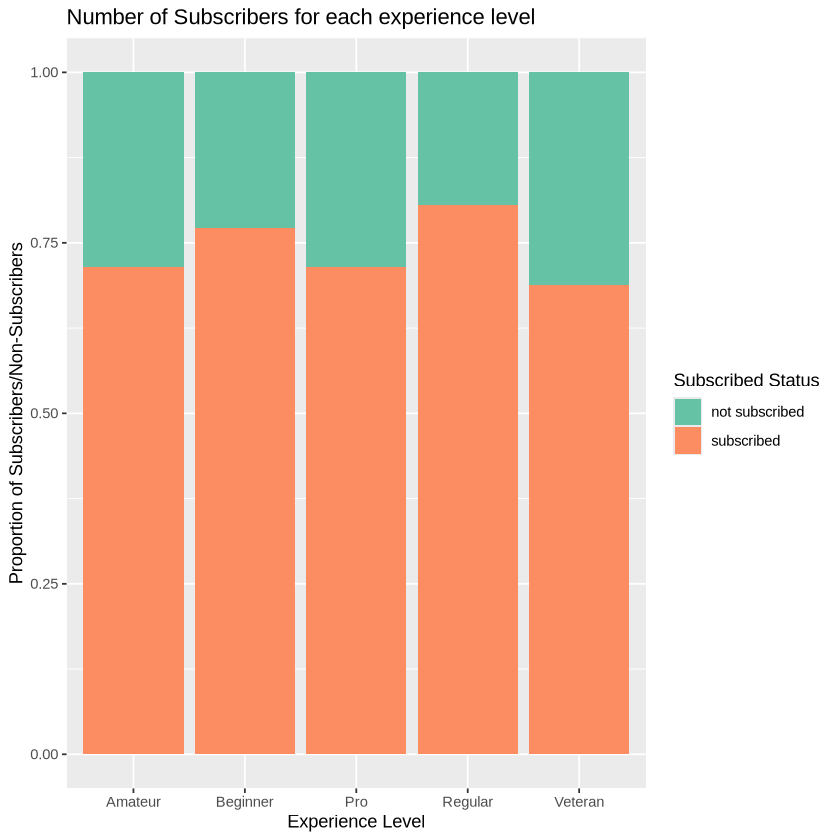

In [17]:
#display.brewer.all(colorblindFriendly = TRUE)

players_plot <- players |> mutate(subscribe = as.character(subscribe)) |> mutate(subscribe = recode(subscribe, "TRUE" = "subscribed", "FALSE" = "not subscribed"))

bar_plot <- players_plot |> ggplot(aes(x=experience, fill=subscribe)) + 
    geom_bar(position="fill") + 
    labs(x="Experience Level", y="Proportion of Subscribers/Non-Subscribers", fill="Subscribed Status") + 
    ggtitle("Number of Subscribers for each experience level") +
    scale_fill_brewer(palette = "Set2")
bar_plot

From analysis of the above barplot, there is no clear relationship between experience and subscribe status. The proportion of subscribers for each experience level is relatively the same, suggesting that experience is not a strong predictor variable. 

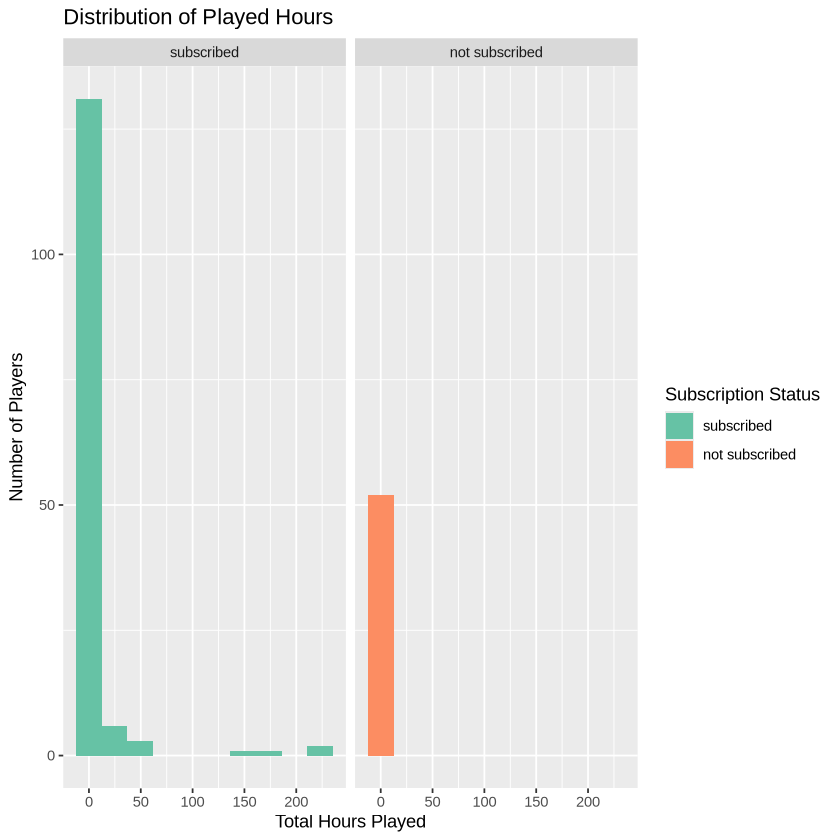

In [46]:
players_hist_data <- players_plot |> mutate(subscribe = as_factor(subscribe))

players_hist <- players_hist_data |> ggplot(aes(x=played_hours, fill = subscribe)) + 
    geom_histogram(position="identity", bins = 10) +
    labs(x="Total Hours Played", y="Number of Players", fill="Subscription Status") + 
    ggtitle("Distribution of Played Hours") +
    facet_grid(cols = vars(subscribe)) +
    scale_fill_brewer(palette = "Set2")
players_hist

From analysis of the above histogram, there is no clear relationship between total hours played and player subscription status. This is because on the right histogram, there is no record of players playing for long durations and not subscribing. This makes the played_hours an unreliable predictor variable. 

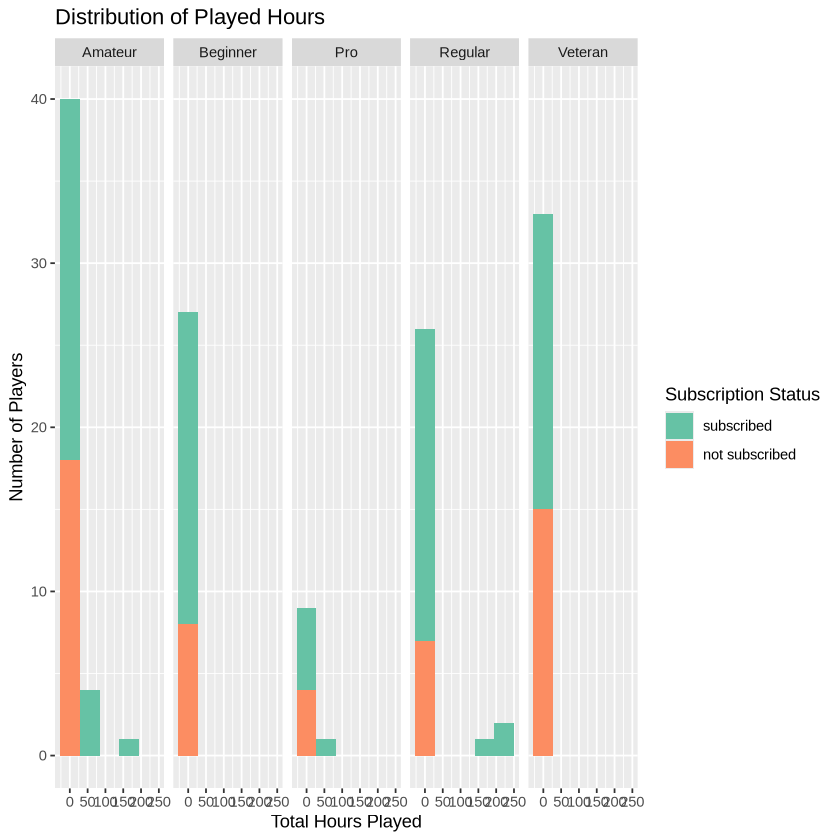

In [44]:
players_hist <- players_hist_data |> ggplot(aes(x=played_hours, fill = subscribe)) + 
    geom_histogram(position="identity", bins = 5) +
    labs(x="Total Hours Played", y="Number of Players", fill="Subscription Status") + 
    ggtitle("Distribution of Played Hours") +
    facet_grid(cols = vars(experience)) +
    scale_fill_brewer(palette = "Set2")
players_hist

From analysis of the above histograms, there is no clear relationship between the predictors (played_hours and experience) and the response variable (subscribe). For each experience level, there proportions of subscribers and non subscribers for each interval is relatively the same. 